# MNIST
---

MNIST is a cannonical image classificaiton task, where hand-written digits are given labels 0-9.
The task is to identify which digit is written.
Because this is **such** a common teaching model, we won't describe what's going on here, besides that we are using a small convolutional neural network to classify hand-written images.

This code:
* Loads data and labels
* Rescales images
* Shows a sample of images
* Builds a small convolutional neural network
* Compiles and trais the neural network
* Saves the trained model

All the code to train and save the model are contained in this notebook and in `train_mnist.py`.

In [1]:
# Import packages
import keras
from keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load training and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape training and test data
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Scale training and test data
x_train = (x_train / 256).astype('float32')
x_test = (x_test / 256).astype('float32')

# One-hot encode training and test labels
y_train = keras.utils.to_categorical(y_train, 10).astype('int')
y_test = keras.utils.to_categorical(y_test, 10).astype('int')

# Record the input shape
input_shape = x_train[0].shape

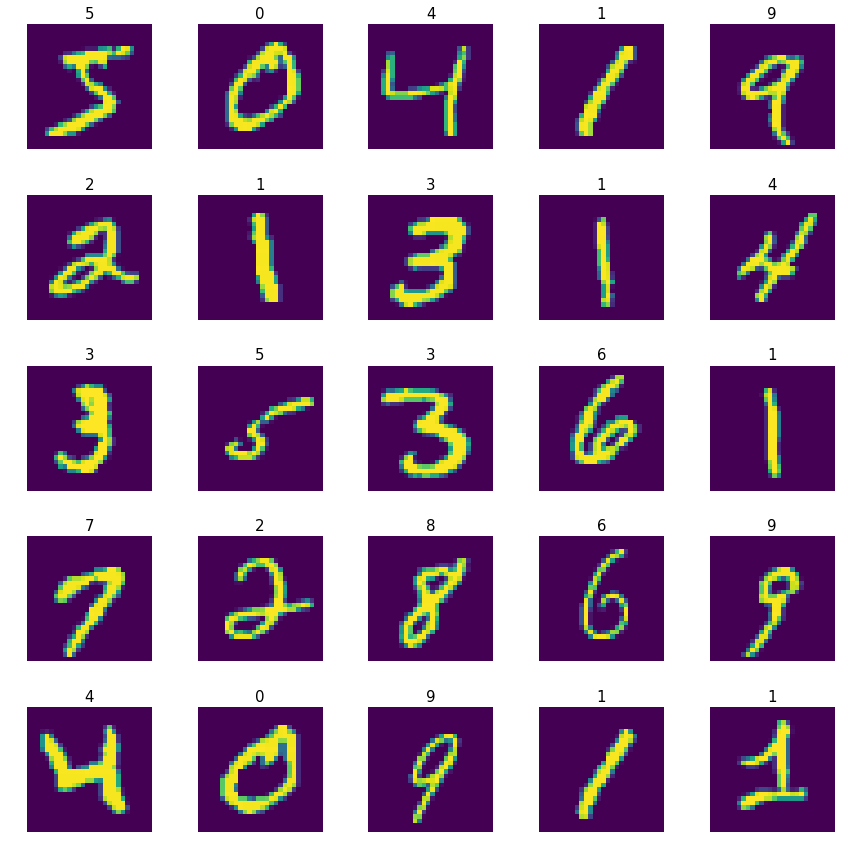

In [3]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    ax = fig.add_subplot(5,5,1+i)
    ax.imshow(x_train[i].reshape(28,28))
    ax.set_title(str(y_train[i].argmax()), fontsize=15)
    ax.axis('off')
fig.tight_layout()

In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(32),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                247840    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 285,738
Trainable params: 285,738
Non-trainable params: 

In [5]:
history = model.fit(x_train, y_train, validation_split=0.1, batch_size=32, epochs=2)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 37s 685us/step - loss: 0.1233 - acc: 0.9627 - val_loss: 0.0432 - val_acc: 0.9883
Epoch 2/2
54000/54000 [==============================] - 36s 669us/step - loss: 0.0424 - acc: 0.9871 - val_loss: 0.0393 - val_acc: 0.9890


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 185us/step


In [7]:
print('The test set has a loss of {:0.3f} and an accuracy of {:0.3f}. Saving model...'.format(test_loss, test_acc))

The test set has a loss of 0.035 and an accuracy of 0.988. Saving model...


In [8]:
model.save('../deployWithDocker/docker/model.h5')